# CNN chalenge

In this exercise, you will build a CNN to classify images from the Fashion MNIST dataset, train the model, evaluate its performance, and visualize predictions with a confusion matrix.

## Prepare the data

Load the Fashion MNIST dataset using Keras and display the first few images with their labels to get a sense of the data.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Task: Normalize the data to have pixel values between 0 and 1
# Your code here

In [22]:
y_test.shape

(10000,)

Visualize 5 random images from the training set with their labels.

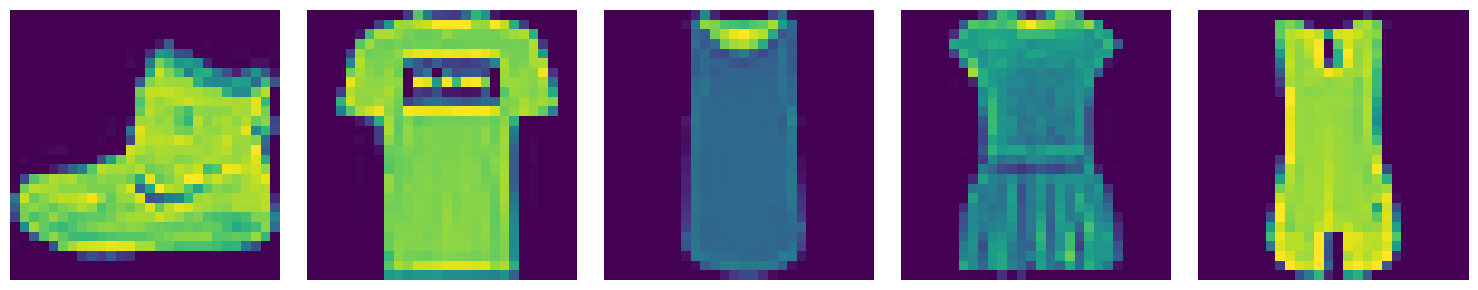

In [2]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].axis('off') 

plt.tight_layout()
plt.show()

Reshape the data to include a channel dimension and confirm the new shape.

In [3]:
# Task: Reshape x_train and x_test to include the channel dimension
# Your code here
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0 
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

## Build the CNN model

Create a CNN with at least two convolutional layers, followed by max pooling layers, and a dense output layer.

Rememeber the `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` and `Dense`layers.

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Task: Build your model here
model = Sequential([
    # Your layers here
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/Users/sergej/Library/Mobile Documents/com~apple~CloudDocs/DS_AI/python_projects/tf_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile your model with an appropriate optimizer, loss function, and metric.

In [24]:
# Task: Compile your model
# Your code here
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

Train your model using model.fit(), setting a validation split of 20% and training for at least 10 epochs.

In [26]:
# Task: Train the model and store the training history in a variable
# Your code here
model.fit(x_train, y_train_one_hot, batch_size=128, epochs=10, validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.7754 - loss: 0.6073 - val_accuracy: 0.8543 - val_loss: 0.4021
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.8575 - loss: 0.4007 - val_accuracy: 0.8838 - val_loss: 0.3288
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.8699 - loss: 0.3608 - val_accuracy: 0.8927 - val_loss: 0.2987
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8759 - loss: 0.3664 - val_accuracy: 0.8905 - val_loss: 0.3241
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.8584 - loss: 0.5089 - val_accuracy: 0.8732 - val_loss: 0.5311
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.8266 - loss: 1.5397 - val_accuracy: 0.8562 - val_loss: 1.7466
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.8091 - loss: 7.2483 - val_accuracy: 0.8182 - val_loss: 13.9587
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7995 - loss: 33.2781 

In [35]:
# To prevent instability and a sharp drop in performance, we stop the training after fewer epochs, right after the model reaches its peak accuracy.
model2 = Sequential([
    # Your layers here
    Conv2D(32, (3, 3), activation='relu', padding='same' ,input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train_one_hot, batch_size=128, epochs=3, validation_split=0.2)

Epoch 1/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.8183 - loss: 0.4939 - val_accuracy: 0.8897 - val_loss: 0.3066
Epoch 2/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.8929 - loss: 0.3048 - val_accuracy: 0.8978 - val_loss: 0.2793
Epoch 3/3
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9020 - loss: 0.2762 - val_accuracy: 0.9032 - val_loss: 0.2905


In [36]:
model2.save('model_32_64_64_128_10.h5')

## Evaluate the model

Evaluate your model on the test set and print the test accuracy.

In [37]:
# Task: Evaluate the model on the test data
# Your code here
score = model.evaluate(x_test, y_test_one_hot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 279.7638854980469
Test accuracy: 0.835099995136261


In [38]:
score2 = model2.evaluate(x_test, y_test_one_hot, verbose=0)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])

Test loss: 0.3034578263759613
Test accuracy: 0.8996999859809875


Use your model to predict the labels for the test set. Display 5 test images with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


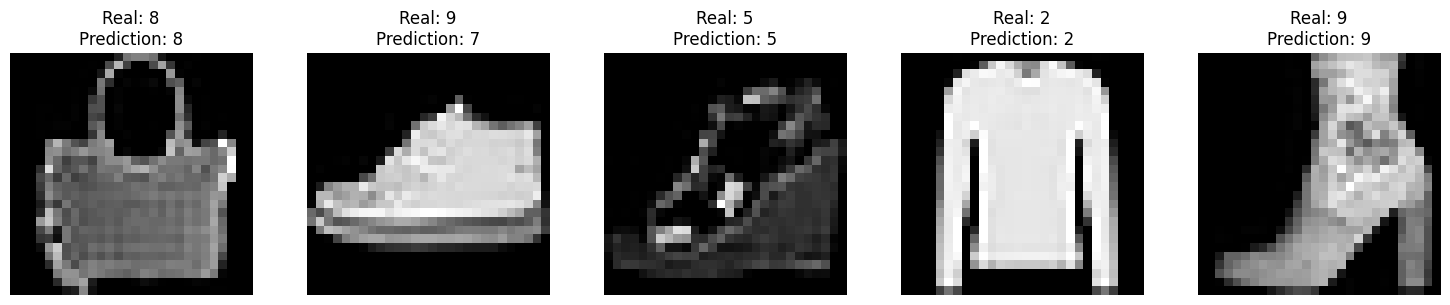

In [39]:
import numpy as np
# Task: Use model.predict() and display predictions
# Your code here to display images with predicted and actual labels
predictions = model2.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)


num_images_to_show = 5
indices = np.random.choice(range(len(x_test)), num_images_to_show, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {y_test[idx]}\nPrediction: {predicted_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Construct a confusion matrix to visualize how well your model performed across different classes.

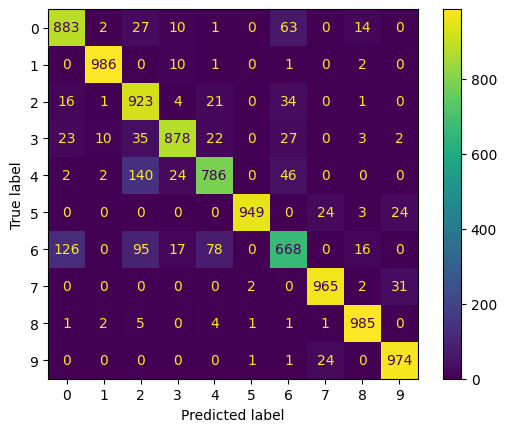

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Task: Create predictions and a confusion matrix
# Your code here

# Display the confusion matrix
# Your code here

from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(y_test, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))


cm_display.plot()
plt.show()